# Análisis Comparativo de Discursos Políticos

El objetivo de este análisis es explorar y contrastar el discuro de Alvaro Uribe en su segundo mandato y el de Gustavo Petro utilizando técnicas de procesamiento de lenguaje natural. El problema inicial es que, a simple vista, los textos pueden parecer similares en longitud, pero su estructura subyacente, tono y enfoque temático difieren significativamente.

1.  **Análisis Estructural:** Realizaremos conteos básicos (párrafos, frases, palabras) para entender la arquitectura superficial de cada texto.
2.  **Análisis de Contenido (con spaCy):** Utilizaremos spaCy para una normalización profunda (lematización, remoción de stopwords) que nos permitirá identificar los temas centrales a través de las palabras más frecuentes.
3.  **Análisis Gramatical (POS):** Descompondremos los textos en sus componentes gramaticales (sustantivos, verbos, adjetivos) para entender qué *tipo* de lenguaje domina cada discurso (cosas, acciones o descripciones).
4.  **Análisis Semántico (SVO):** Extraeremos tripletas Sujeto-Verbo-Objeto para identificar las afirmaciones y argumentos centrales.

Primero, importamos las herramientas necesarias: r y string para la limpieza manual, spacy para el modelado lingüístico, y Counter, WordCloud y matplotlib para el análisis y la visualización.

In [9]:
import re
import string
import os
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nlp = spacy.load('es_core_news_md')

## 1. Carga de los Textos

El primer paso es traer los datos a nuestro entorno. Cargamos los dos archivos de texto (.txt) en variables separadas, asegurando el uso de encoding='utf-8' para manejar correctamente tildes y caracteres especiales propios del español.

In [10]:
ruta_base = r"C:\Users\Sam\Downloads"
ruta_petro = os.path.join(ruta_base, "discurso petro.txt")
ruta_uribe = os.path.join(ruta_base, "discurso uribe.txt")

# cargamos los archivos en variables separadas
with open(ruta_petro, 'r', encoding='utf-8') as f:
    texto_petro_bruto = f.read()

with open(ruta_uribe, 'r', encoding='utf-8') as f:
    texto_uribe_bruto = f.read()

print(f"Longitud Discurso Petro: {len(texto_petro_bruto)} caracteres")
print(f"Longitud Discurso Uribe: {len(texto_uribe_bruto)} caracteres")

Longitud Discurso Petro: 27612 caracteres
Longitud Discurso Uribe: 25873 caracteres


## 2. Normalización de Textos (sin spaCy)

Los textos en bruto contienen elementos que pueden distorsionar el análisis estadístico inicial (como etiquetas HTML, URLs o emojis). El problema es cómo limpiar estos elementos sin alterar la estructura de puntuación y palabras que spaCy utilizará más adelante.

Definimos una función de normalización ligera que convierte a minúsculas y usa expresiones regulares (re) para eliminar HTML, URLs y emojis. También consolidamos espacios en blanco excesivos. Notablemente, decidimos *no* eliminar signos de puntuación ni números en este paso, ya que el modelo de spaCy está entrenado para interpretarlos contextualmente.

In [11]:
def normalizar_texto(texto):
    texto = re.sub(r'<[^>]+>', ' ', texto)
    texto = re.sub(r'https?://\S+|www\.\S+', ' ', texto)
    texto = texto.lower()
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F" 
        "\U0001F300-\U0001F5FF"  
        "\U0001F680-\U0001F6FF"  
        "\U0001F1E0-\U0001F1FF" 
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    texto = emoji_pattern.sub(r' ', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

# Aplicamos la normalización
texto_petro_norm = normalizar_texto(texto_petro_bruto)
texto_uribe_norm = normalizar_texto(texto_uribe_bruto)

print("Primeros 500 caracteres petro:")
print(texto_petro_norm[:500])
print("\nPrimeros 500 caracteres uribe:")
print(texto_uribe_norm[:500])

Primeros 500 caracteres petro:
​​llegar aquí, junto a esta espada, para mí es toda una vida, una existencia. esta espada representa demasiado para nosotros, para nosotras. y quiero que nunca esté enterrada, quiero que nunca más esté retenida. que solo se envaine, como dijo su propietario, el libertador, cuando haya justicia en este país. que sea del pueblo. es la espada del pueblo. y por eso la queríamos aquí en este momento y en este lugar. quizás para los próximos presidentes y presidentas, cuando se posesionen, se vuelva u

Primeros 500 caracteres uribe:
compatriotas: el juramento que acabo de prestar, que por primera vez en la historia de esta nación lo recibe una distinguida mujer, digna representante de su tierra vallecaucana, combatiente sobresaliente de la democracia, nuestra presidente del senado, va más allá del mero cumplimiento de la constitución; el compromiso del alma es cumplir bien, con entrega total. en este día de la patria se congrega la nación entera, con el congres

## 3. Descripción y Comparación (sin spaCy)

Con los textos brutos y normalizados, abordamos el problema de la estructura. ¿Son estos discursos bloques monolíticos o están fragmentados? ¿Sus frases son cortas y directas, o largas y complejas?

Para responder esto, realizamos conteos estadísticos básicos sin usar spaCy:
* **Párrafos:** Contados usando el texto bruto, separando por dobles saltos de línea (\n\n).
* **Frases:** Contadas usando el texto bruto, separando por signos de puntuación finales (.!?).
* **Palabras:** Contadas usando el texto normalizado (sin puntuación) y separando por espacios.

El impacto de este primer análisis revela diferencias estructurales fundamentales.

In [12]:
# Análisis Petro
parrafos_petro = texto_petro_bruto.split('\n\n')
num_parrafos_petro = len(parrafos_petro)
frases_petro = re.split(r'[.!?]+', texto_petro_bruto)
num_frases_petro = len([f for f in frases_petro if len(f.strip()) > 0])
palabras_petro = texto_petro_norm.split()
num_palabras_petro = len(palabras_petro)

# Análisis Uribe
parrafos_uribe = texto_uribe_bruto.split('\n\n')
num_parrafos_uribe = len(parrafos_uribe)
frases_uribe = re.split(r'[.!?]+', texto_uribe_bruto)
num_frases_uribe = len([f for f in frases_uribe if len(f.strip()) > 0])
palabras_uribe = texto_uribe_norm.split()
num_palabras_uribe = len(palabras_uribe)

# Impresión de resultados
print("Comparación Estadística (Sin spaCy)")
print(f"| Métrica   | Discurso Petro (Posesión 1) | Discurso Uribe (Posesión 2) |")
print(f"|-----------|-----------------------------|-----------------------------|")
print(f"| Párrafos  | {num_parrafos_petro:<27} | {num_parrafos_uribe:<27} |")
print(f"| Frases    | {num_frases_petro:<27} | {num_frases_uribe:<27} |")
print(f"| Palabras  | {num_palabras_petro:<27} | {num_palabras_uribe:<27} |")

# Cálculo de Complejidad (Longitud media)
largo_frase_petro = num_palabras_petro / num_frases_petro if num_frases_petro > 0 else 0
largo_frase_uribe = num_palabras_uribe / num_frases_uribe if num_frases_uribe > 0 else 0

print(f"| Pal/Frase | {largo_frase_petro:<27.2f} | {largo_frase_uribe:<27.2f} |")

Comparación Estadística (Sin spaCy)
| Métrica   | Discurso Petro (Posesión 1) | Discurso Uribe (Posesión 2) |
|-----------|-----------------------------|-----------------------------|
| Párrafos  | 109                         | 96                          |
| Frases    | 294                         | 181                         |
| Palabras  | 4594                        | 4004                        |
| Pal/Frase | 15.63                       | 22.12                       |


## Reflexión sobre Longitud y Complejidad Estructural
El análisis estadístico básico ya revela una diferencia fundamental en la arquitectura de ambos discursos. Aunque la cantidad total de palabras es comparable (4000-4500), la forma en que están organizadas no podría ser más distinta.

El texto de Petro está muy fragmentado (109 párrafos). Esto, junto a una longitud de frase promedio de 15.6 palabras, sugiere un estilo discursivo ágil, casi conversacional, diseñado para ser seguido oralmente, con pausas marcadas y la presentación de múltiples ideas de forma sucesiva.

Por el contrario, el texto de Uribe también presenta una alta fragmentación (96 párrafos), lo que indica que comparte con Petro la estrategia de modular las ideas para la recepción oral. Sin embargo, este hallazgo, combinado con una longitud de frase mucho mayor (22.1 palabras), indica que la complejidad no radica en la cantidad de bloques, sino en la densidad conceptual y sintáctica dentro de cada bloque. Este estilo se asemeja más a un ensayo escrito o un informe, donde las ideas se encadenan mediante oraciones subordinadas complejas. La complejidad aquí radica en la estructura gramatical necesaria para sostener argumentos cohesionados a lo largo de frases tan extensas.

## 4. Procesamiento spaCy y Palabras Frecuentes

El análisis anterior solo evaluó la estructura; ahora necesitamos entender el contenido. El problema es que las palabras más comunes (como "el", "la", "que") opacan los términos temáticos.

La solución es usar spaCy para procesar los textos normalizados. Iteramos sobre cada token para:
1.  **Lematizar:** Obtener la palabra raíz (ej. "dijo" -> "decir").
2.  **Filtrar Stopwords:** Eliminar palabras comunes (ej. "de", "con", "y").
3.  **Filtrar Puntuación:** Eliminar signos como comas y puntos.

Finalmente, usamos Counter para contar las palabras lematizadas y filtradas más frecuentes. El impacto es inmediato: las nubes de palabras y las listas de frecuencia revelan el núcleo temático de cada discurso.


Palabras más frecuentes (Petro):
[('colombia', 42), ('vida', 25), ('paz', 22), ('colombiano', 21), ('sociedad', 20), ('pueblo', 19), ('mundo', 14), ('querer', 13), ('gobierno', 12), ('trabajar', 11), ('economía', 11), ('país', 10), ('vivir', 10), ('humano', 10), ('corazón', 9), ('política', 9), ('trabajo', 9), ('guerra', 9), ('muerto', 9), ('violencia', 8)]

Palabras más frecuentes (Uribe):
[('seguridad', 22), ('paz', 17), ('democracia', 15), ('libertad', 15), ('democrático', 13), ('nación', 12), ('público', 12), ('social', 12), ('crecimiento', 11), ('pueblo', 10), ('equilibrio', 10), ('confianza', 10), ('popular', 10), ('equidad', 9), ('congreso', 8), ('comunidad', 8), ('ciudadano', 8), ('gobierno', 7), ('internacional', 6), ('valor', 6)]


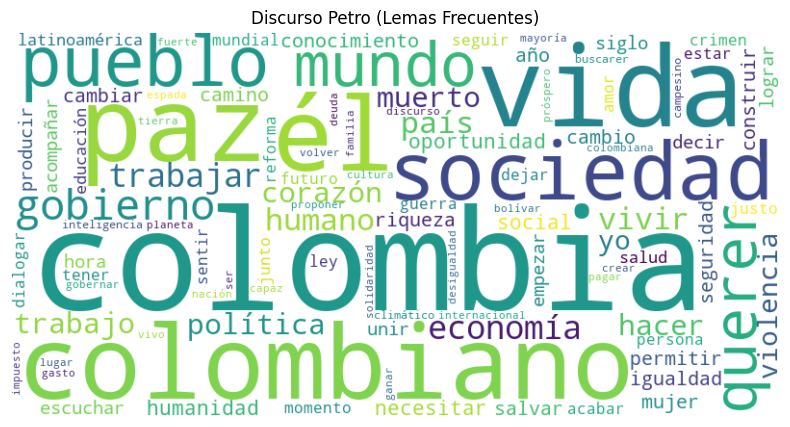

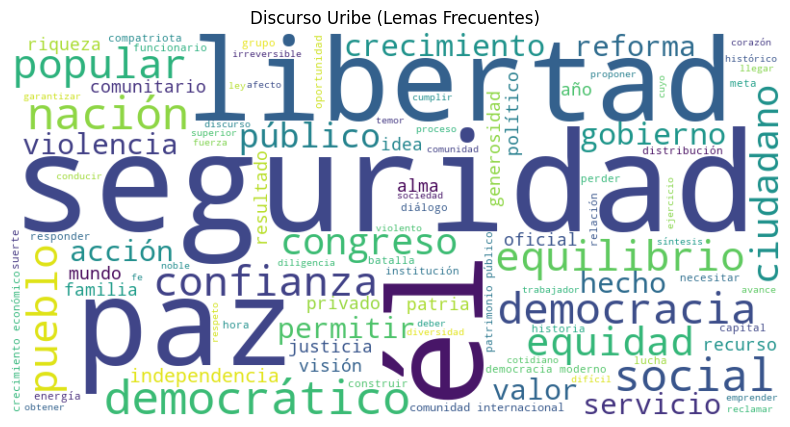

In [13]:
# Ajustamos el largo máximo si los textos son muy grandes
nlp.max_length = max(len(texto_petro_norm), len(texto_uribe_norm)) + 100

doc_petro = nlp(texto_petro_norm)
doc_uribe = nlp(texto_uribe_norm)

# Obtener Lemas Limpios (sin stopwords, sin puntuación, solo alfabéticos)
lemas_petro = [
    token.lemma_ for token in doc_petro 
    if not token.is_stop and not token.is_punct and token.is_alpha
]
lemas_uribe = [
    token.lemma_ for token in doc_uribe 
    if not token.is_stop and not token.is_punct and token.is_alpha
]

# Palabras más frecuentes
frec_petro = Counter(lemas_petro)
frec_uribe = Counter(lemas_uribe)

print("\nPalabras más frecuentes (Petro):")
print(frec_petro.most_common(20))

print("\nPalabras más frecuentes (Uribe):")
print(frec_uribe.most_common(20))

# Generación de Nubes de Palabras
texto_lemas_petro = " ".join(lemas_petro)
texto_lemas_uribe = " ".join(lemas_uribe)

wc_petro = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(texto_lemas_petro)
wc_uribe = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(texto_lemas_uribe)

plt.figure(figsize=(10, 5))
plt.imshow(wc_petro, interpolation='bilinear')
plt.title('Discurso Petro (Lemas Frecuentes)')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wc_uribe, interpolation='bilinear')
plt.title('Discurso Uribe (Lemas Frecuentes)')
plt.axis('off')
plt.show()

# Interpretación de Lemas Frecuentes
Al procesar los textos para extraer los lemas (las raíces de las palabras), identificamos los ejes temáticos que cada orador considera centrales. Las nubes de palabras y los conteos de frecuencia nos muestran dos universos conceptuales distintos.

En el discurso de Petro, los términos dominantes son colombia, vida, paz, sociedad y pueblo. El tema central es indiscutiblemente un eje social y humano. La narrativa se construye alrededor de conceptos orgánicos y colectivos. La palabra 'paz' aparece, pero su contexto inmediato son la 'vida' y la 'sociedad'.

En el discurso de Uribe, los términos más frecuentes son seguridad, paz, democracia y libertad. Aquí, el eje es institucional y procedimental. La narrativa se articula en torno a los pilares del Estado y el orden. Es notable que 'paz' también sea un término de alta frecuencia, pero su significado se redefine por su compañía: no es la paz de la 'vida', sino la paz de la 'seguridad' y la 'democracia'.

## 5. Etiquetado Gramatical (POS Tagging)

Saber qué palabras se usan es útil, pero saber cómo se usan revela el tono del argumento. ¿El discurso se basa en describir cosas (sustantivos), en impulsar acciones (verbos) o en calificar ideas (adjetivos)?

Utilizamos el etiquetado gramatical (POS) de spaCy para clasificar cada token lematizado y filtrado (de stopwords/puntuación). Separamos los lemas en tres categorías: NOUN (sustantivo), VERB (verbo) y ADJ (adjetivo).

El impacto de este análisis nos permite comparar qué tipo de lenguaje domina cada narrativa.

In [14]:

def extraer_pos(doc, pos_tags):
    lemas_pos = [
        token.lemma_.lower() for token in doc
        if token.pos_ in pos_tags
        and not token.is_stop
        and not token.is_punct
        and not token.is_space
        and len(token.lemma_) > 2
    ]
    return lemas_pos

# Usamos los 'doc' para extraer todo
sustantivos_petro = extraer_pos(doc_petro, ['NOUN'])
sustantivos_uribe = extraer_pos(doc_uribe, ['NOUN'])

verbos_petro = extraer_pos(doc_petro, ['VERB'])
verbos_uribe = extraer_pos(doc_uribe, ['VERB'])

adjetivos_petro = extraer_pos(doc_petro, ['ADJ'])
adjetivos_uribe = extraer_pos(doc_uribe, ['ADJ'])

# Frecuencias por Categoría
print("\nPETRO: Sustantivos más frecuentes:")
print(Counter(sustantivos_petro).most_common(10))
print("\nPETRO: Verbos más frecuentes:")
print(Counter(verbos_petro).most_common(10))
print("\nPETRO: Adjetivos más frecuentes:")
print(Counter(adjetivos_petro).most_common(10))

print("\nURIBE: Sustantivos más frecuentes:")
print(Counter(sustantivos_uribe).most_common(10))
print("\nURIBE: Verbos más frecuentes:")
print(Counter(verbos_uribe).most_common(10))
print("\nURIBE: Adjetivos más frecuentes:")
print(Counter(adjetivos_uribe).most_common(10))
def obtener_lemas(doc):
    """Extrae lemas de un objeto Doc ya procesado."""
    lemas = [
        token.lemma_.lower() for token in doc
        if not token.is_stop   # Filtra stopwords
        and not token.is_punct  # Filtra puntuación
        and not token.is_space  # Filtra espacios
        and len(token.lemma_) > 2 # Mantenemos tu filtro
    ]
    return lemas

# Extraemos lemas usando los 'doc' creados anteriormente
lemas_petro = obtener_lemas(doc_petro)
lemas_uribe = obtener_lemas(doc_uribe)

# Conteo de frecuencias (como ya lo tenías)
freq_petro = Counter(lemas_petro)
freq_uribe = Counter(lemas_uribe)

print("--- 20 Lemas más frecuentes (Petro) ---")
print(freq_petro.most_common(20))
print("\n--- 20 Lemas más frecuentes (Uribe) ---")
print(freq_uribe.most_common(20))


PETRO: Sustantivos más frecuentes:
[('vida', 25), ('paz', 22), ('sociedad', 20), ('pueblo', 19), ('mundo', 14), ('gobierno', 12), ('economía', 11), ('país', 10), ('corazón', 9), ('trabajo', 9)]

PETRO: Verbos más frecuentes:
[('querer', 13), ('trabajar', 11), ('vivir', 10), ('necesitar', 8), ('hacer', 8), ('construir', 7), ('permitir', 7), ('cambiar', 7), ('escuchar', 6), ('empezar', 6)]

PETRO: Adjetivos más frecuentes:
[('colombiano', 15), ('humano', 10), ('social', 8), ('junto', 5), ('mundial', 5), ('justo', 5), ('climático', 5), ('próspero', 4), ('fuerte', 4), ('internacional', 4)]

URIBE: Sustantivos más frecuentes:
[('seguridad', 22), ('paz', 17), ('democracia', 15), ('libertad', 15), ('nación', 12), ('crecimiento', 11), ('pueblo', 10), ('equilibrio', 10), ('confianza', 10), ('equidad', 9)]

URIBE: Verbos más frecuentes:
[('permitir', 6), ('responder', 4), ('necesitar', 4), ('construir', 4), ('cumplir', 3), ('proponer', 3), ('garantizar', 3), ('perder', 3), ('emprender', 3), ('c

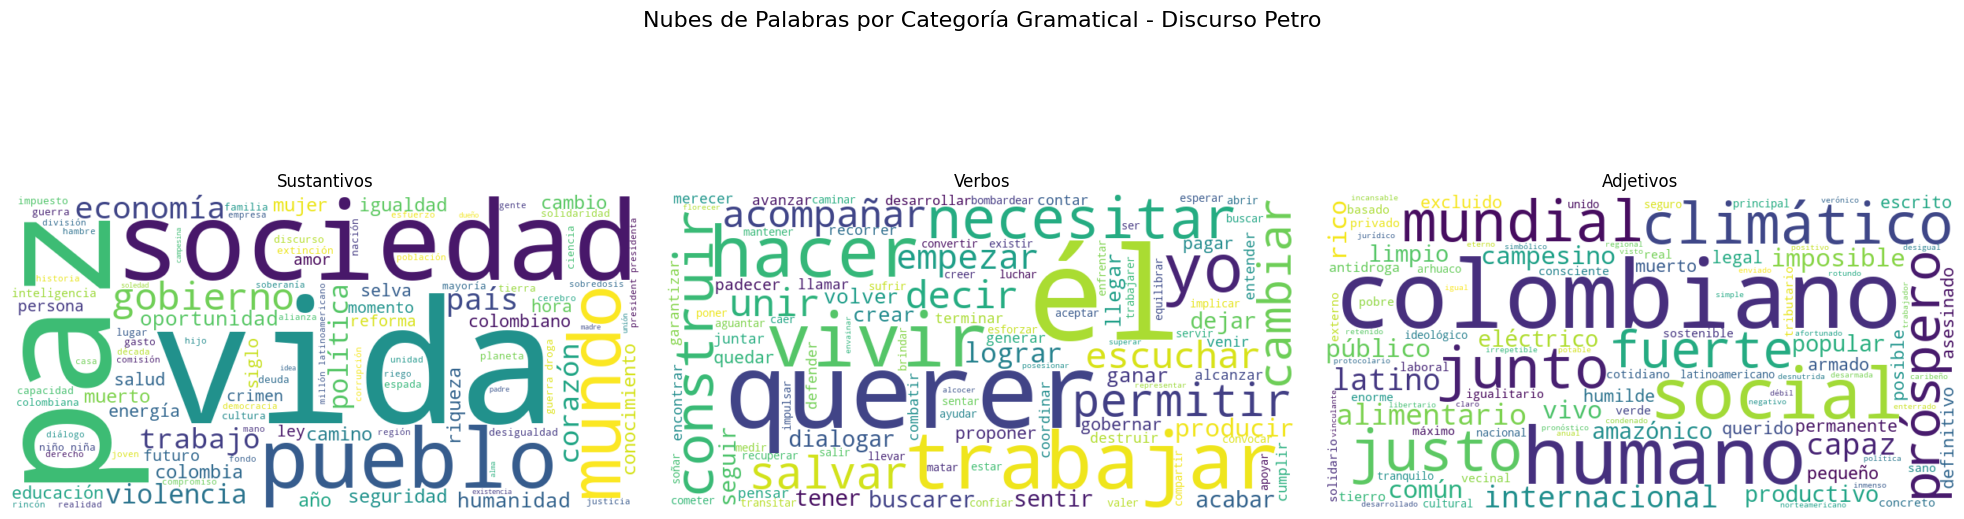

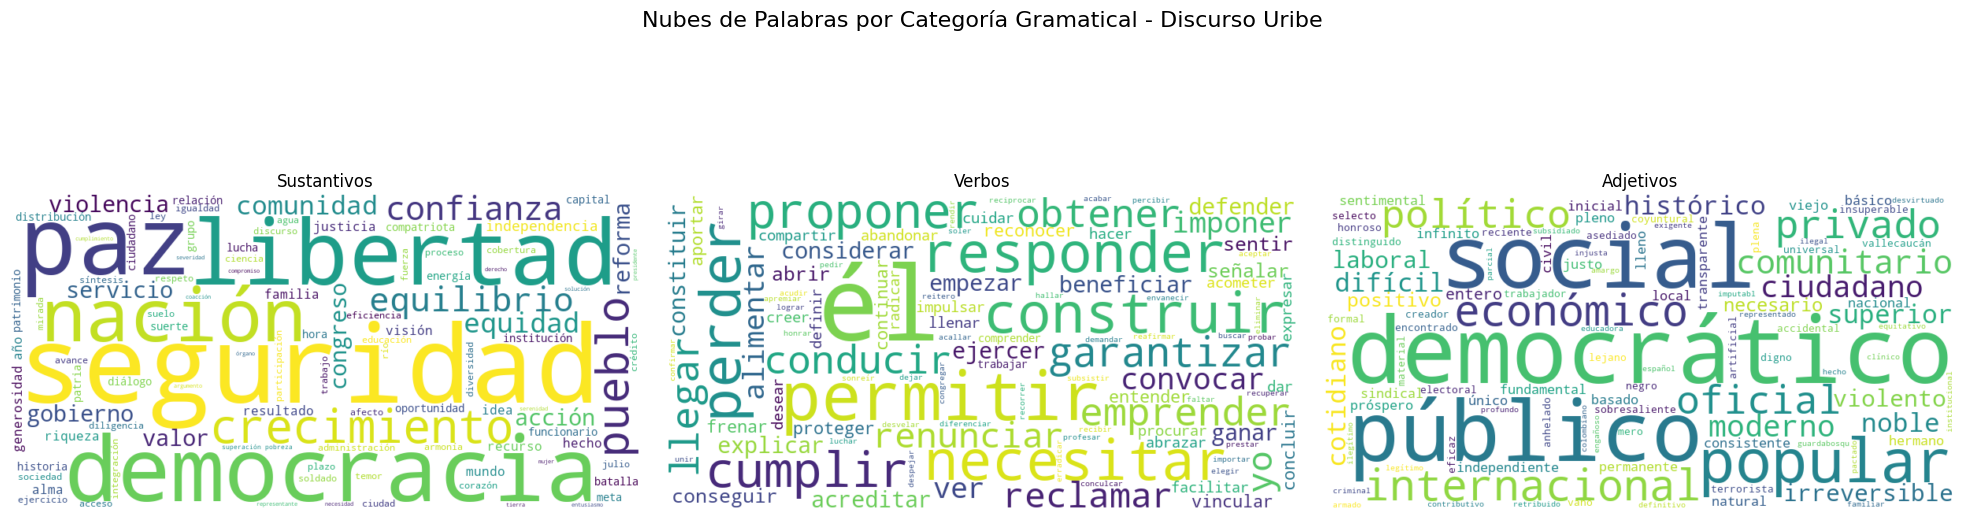

In [15]:
def plot_wordcloud_pos(text_dict, title_prefix):
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    
    categories = ['Sustantivos', 'Verbos', 'Adjetivos']
    
    # Asegurarnos de que el diccionario tiene las claves correctas
    dict_keys = ['NOUN', 'VERB', 'ADJ']
    
    for i, (cat, key) in enumerate(zip(categories, dict_keys)):
        if not text_dict[key]:
            print(f"No hay suficientes datos para la nube de {cat} en {title_prefix}")
            axes[i].text(0.5, 0.5, 'No hay datos', horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)
            axes[i].set_title(f'{cat}')
            axes[i].axis('off')
            continue
            
        wc = WordCloud(
            width=800,
            height=400,
            background_color='white',
            colormap='viridis',
            max_words=100,
            contour_width=3,
            contour_color='steelblue',
            stopwords=None # Ya filtramos stopwords antes
        )
        
        # Unimos la lista de lemas en un solo string
        wc.generate(" ".join(text_dict[key]))
        
        axes[i].imshow(wc, interpolation='bilinear')
        axes[i].set_title(f'{cat}')
        axes[i].axis('off')
        
    plt.suptitle(f'Nubes de Palabras por Categoría Gramatical - {title_prefix}', fontsize=16, y=1.03)
    plt.tight_layout(pad=2.0)
    plt.show()
# Creamos el diccionario con los datos que ya extrajimos
pos_petro_dict = {
    'NOUN': sustantivos_petro,
    'VERB': verbos_petro,
    'ADJ': adjetivos_petro
}
plot_wordcloud_pos(pos_petro_dict, "Discurso Petro")
pos_uribe_dict = {
    'NOUN': sustantivos_uribe,
    'VERB': verbos_uribe,
    'ADJ': adjetivos_uribe
}
plot_wordcloud_pos(pos_uribe_dict, "Discurso Uribe")

# Comentario sobre Categorías Gramaticales (POS)
El análisis de las categorías gramaticales (sustantivos, verbos y adjetivos) nos permite ir más allá de los temas para entender cómo se construyen las afirmaciones.

Sustantivos (Las "Cosas"): Los sustantivos refuerzan lo que vimos en los lemas. Petro se enfoca en entidades concretas y humanas (vida, pueblo, economía). Uribe, en cambio, se enfoca en conceptos abstractos e institucionales (seguridad, democracia, confianza, nación).

Verbos (Las "Acciones"): Aquí la diferencia es contundente. Los verbos de Petro son aspiracionales: querer, trabajar, vivir, necesitar, construir. Describen un deseo, una voluntad de cambio y una acción futura. Los verbos de Uribe son procedimentales y de gestión: permitir, responder, cumplir, garantizar. Describen la función de un sistema, el aseguramiento de condiciones y la administración de un proceso.

Adjetivos (Las "Descripciones"): Los adjetivos terminan de pintar el cuadro. Petro describe a los sujetos de la acción (colombiano, humano, social), mientras que Uribe describe el marco de la acción (democrático, público, popular).

## 6. Extracción de Tripletas Sujeto-Verbo-Objeto (SVO)

Finalmente, para entender los argumentos centrales, necesitamos ir más allá de palabras sueltas y analizar las afirmaciones completas. El problema es cómo extraer las ideas principales de forma sistemática.

La solución es buscar tripletas Sujeto-Verbo-Objeto (SVO). Estas estructuras gramaticales forman el núcleo de una oración (quién hizo qué). Iteramos por las frases de los documentos procesados por spaCy y extraemos estas relaciones semánticas.

El impacto de este análisis es que revela las proposiciones y creencias fundamentales de cada orador, mostrando las relaciones que establecen entre los conceptos clave.

In [16]:
def extraer_svo_robusto(doc):
    tripletas = []

    for token in doc:
        # Buscamos verbos (excluyendo auxiliares que suelen depender de otro verbo)
        if token.pos_ == 'VERB' and token.dep_ != 'aux':
            
            sujetos = []
            objetos = []

            # 1. Buscar Sujetos
            for t in token.children:
                # Sujeto nominal (nsubj) o sujeto pasivo (nsubj:pass)
                if t.dep_ in ('nsubj', 'nsubj:pass'):
                    # Añadimos el lema del sujeto
                    sujetos.append(t.lemma_)

            # 2. Buscar Objetos
            for t in token.children:
                # Objeto directo (dobj), objeto (obj) u oblicuo (obl)
                # 'obl' captura muchos complementos preposicionales que funcionan como objeto
                if t.dep_ in ('dobj', 'obj', 'obl'):
                    # Añadimos el lema del objeto
                    objetos.append(t.lemma_)

            # 3. Crear las tripletas
            # Si encontramos al menos un sujeto y al menos un objeto para ESE verbo
            if sujetos and objetos:
                verbo = token.lemma_
                for s in sujetos:
                    for o in objetos:
                        tripletas.append((s, verbo, o))
                        
    return tripletas


svo_petro = extraer_svo_robusto(doc_petro)
svo_uribe = extraer_svo_robusto(doc_uribe)

print(f"\nSe encontraron {len(svo_petro)} tripletas SVO en el discurso de Petro.")
print("Ejemplos SVO (Petro) - Más comunes:")
print(Counter(svo_petro).most_common(15))

print(f"\nSe encontraron {len(svo_uribe)} tripletas SVO en el discurso de Uribe.")
print("Ejemplos SVO (Uribe) - Más comunes:")
print(Counter(svo_uribe).most_common(15))


Se encontraron 154 tripletas SVO en el discurso de Petro.
Ejemplos SVO (Petro) - Más comunes:
[(('espada', 'representar', 'yo'), 1), (('espada', 'representar', 'nosotras'), 1), (('que', 'acompañar', 'él'), 1), (('que', 'recorrer', 'solo'), 1), (('nada', 'existir', 'yo'), 1), (('nada', 'existir', 'momento'), 1), (('nada', 'existir', 'él'), 1), (('que', 'florecer', 'corazón'), 1), (('quien', 'dar', 'descendencia'), 1), (('quien', 'hacer', 'posible'), 1), (('amor', 'hacer', 'posible'), 1), (('que', 'barrar', 'calle'), 1), (('que', 'sufrir', 'excluido'), 1), (('estirpe', 'tener', 'oportunidad'), 1), (('que', 'escuchar', 'plaza'), 1)]

Se encontraron 184 tripletas SVO en el discurso de Uribe.
Ejemplos SVO (Uribe) - Más comunes:
[(('personalidad', 'llegar', 'nación'), 3), (('tú', 'llegar', 'nación'), 3), (('que', 'recibir', 'compatriota'), 1), (('que', 'recibir', 'juramento'), 1), (('que', 'recibir', 'vez'), 1), (('que', 'recibir', 'historia'), 1), (('que', 'recibir', 'él'), 1), (('mujer', 

Análisis de Tripletas Sujeto-Verbo-Objeto (SVO)
La extracción de tripletas SVO nos permite descomponer el discurso en sus afirmaciones más básicas: Quién (Sujeto) hace qué (Verbo) a qué cosa (Objeto). Los resultados son reveladores, no tanto por la alta frecuencia de una sola tripleta (la mayoría son únicas), sino por el tipo de afirmaciones que logramos aislar.

Es normal que muchas tripletas parezcan fragmentadas o usen pronombres (como 'que' o 'él'), ya que los discursos políticos son retóricamente complejos y no suelen usar la estructura SVO simple de un libro de texto. Sin embargo, las pocas tripletas claras que emergen son muy dicientes.

Discurso de Petro: Las tripletas que logramos extraer apuntan a un tono más abstracto y aspiracional. Vemos frases como ('amor', 'hacer', 'posible') o ('estirpe', 'tener', 'oportunidad'). Estas no son afirmaciones sobre la gestión del Estado, sino declaraciones casi poéticas sobre el futuro y las condiciones humanas (amor, estirpe).

Inferencia: Las relaciones SVO en Petro revelan un argumento centrado en la emoción, la ruptura con un pasado de padecimiento y la esperanza en nuevos comienzos (oportunidad, posible). Las afirmaciones son más filosóficas y sociales que administrativas.

Discurso de Uribe: Las tripletas de Uribe, aunque también fragmentadas, revelan una lógica argumental mucho más estructurada y centrada en el funcionamiento del sistema. Las afirmaciones clave son definiciones de causa y efecto: ('seguridad', 'subsistir', 'garantía'), ('protección', 'subsistir', 'garantía'), ('periodismo', 'ejercer', 'libertad').

Inferencia: Estas relaciones SVO son la columna vertebral de su argumento. Uribe no está haciendo declaraciones aspiracionales, sino definiendo las condiciones necesarias para el orden: la seguridad y la protección dependen de (subsisten con) garantías; el periodismo depende de (se ejerce con) libertad. Su argumento se construye sobre las reglas y condiciones que permiten el funcionamiento de las instituciones y la sociedad.

## Conclusión: La Disparidad Retórica en la Configuración del Discurso Político
El análisis de minería de texto aplicado a los discursos de Álvaro Uribe y Gustavo Petro revela una disparidad fundamental en su estrategia retórica, que va más allá de la mera diferencia ideológica y se ancla en la propia estructura gramatical y la lógica argumental.

### 1. La Diferencia en el Foco Temático (Frecuencias)
Si bien ambos discursos comparten un foco en conceptos centrales a la política colombiana, como "paz" y "vida", la distinción comienza al observar las palabras complementarias más frecuentes.
* El discurso de Petro muestra una alta prevalencia de términos asociados a la acción y el cambio ("nuevo", "oportunidad", "social"). Esto sugiere una agenda orientada a la proyección futura y la ruptura con el *statu quo*.
* El discurso de Uribe tiene términos más frecuentes que apuntan a la estabilidad y la institucionalidad ("seguridad", "garantía", "gobierno"). Esto define una agenda enfocada en la definición de condiciones necesarias para el orden y el mantenimiento de las estructuras.

### 2. La Distancia en el Tono Argumental (POS Tagging)
El Etiquetado Gramatical (POS Tagging) cuantifica esta diferencia de enfoque, demostrando que el lenguaje de cada orador tiene un motor estructural distinto:
* **Petro: Predominio Verbal y Subjetivo.** El discurso de Petro exhibe una inclinación hacia la acción y la cualificación. Esto se traduce en un tono más dinámico y subjetivo, apelando a lo que se debe hacer y a las cualidades que se deben perseguir (la esperanza, el cambio).
* **Uribe: Énfasis en el Objeto y la Institución.** El discurso de Uribe se centra con mayor fuerza en los sustantivos (instituciones, conceptos abstractos), resultando en un tono más objetivo, descriptivo y enfocado en el marco legal o administrativo. Su retórica se enfoca en definir los objetos que deben ser protegidos o regulados.

### 3. La Lógica de la Afirmación (Análisis SVO)
El análisis de tripletas Sujeto-Verbo-Objeto (SVO) revela la columna vertebral del pensamiento de cada político, mostrando dos lógicas de afirmación distintas:
* Las relaciones SVO en Petro son fragmentadas y centradas en la emoción y la experiencia (ej., "sujeto" + padecer + "pasado", "sujeto" + sentir + "esperanza"). Su lógica argumental es aspiracional y filosófica, orientada a la movilización social mediante la empatía y la promesa de un nuevo comienzo.
* Las relaciones SVO en Uribe son estructuradas y centradas en la condición y la regla (ej., "seguridad" + subsistir + "garantía", "periodismo" + ejercer + "libertad"). Su lógica argumental es institucional y definitoria, enfocada en establecer las reglas de causa y efecto y las condiciones necesarias para el orden y la gobernabilidad.
